# Train DECIPHER model with multi-slices

> (Estimated time: ~5 min with GPU)

In this vignette, we show how to train `DECIPHER` model on multiple spatial slices with batch effects.

1. Check data
2. Run DECIPHER
3. Visualize results

In [2]:
import scanpy as sc

from decipher import DECIPHER
from decipher.utils import scanpy_viz, gex_embedding

In [3]:
sc.set_figure_params(dpi=80)

## Step 1: Check data

Here we use two simulation slices as an example, you can download them from Google Drive ([slice1](https://drive.google.com/file/d/1-J5YEkhujw1c67VkU1XJYsUonlS2kbZ5/view?usp=sharing), [slice2](https://drive.google.com/file/d/18j8IuiNtvrDj4D7m9fvWAiCDnPmHHfHq/view?usp=sharing))

In [4]:
slice1 = sc.read_h5ad('./slice1.h5ad')
slice2 = sc.read_h5ad('./slice2.h5ad')
adata = slice1.concatenate(slice2, batch_key='slice')

/tmp/ipykernel_1286019/665345369.py:3: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = slice1.concatenate(slice2, batch_key='slice')


These two slices share the same cell types:
- T cell
- B cell
- Monocyte

They also share the same spatial patterns:
- region 1: T cell & Monocyte mixed
- region 2: T cell only
- region 3: T cell & B cell mixed

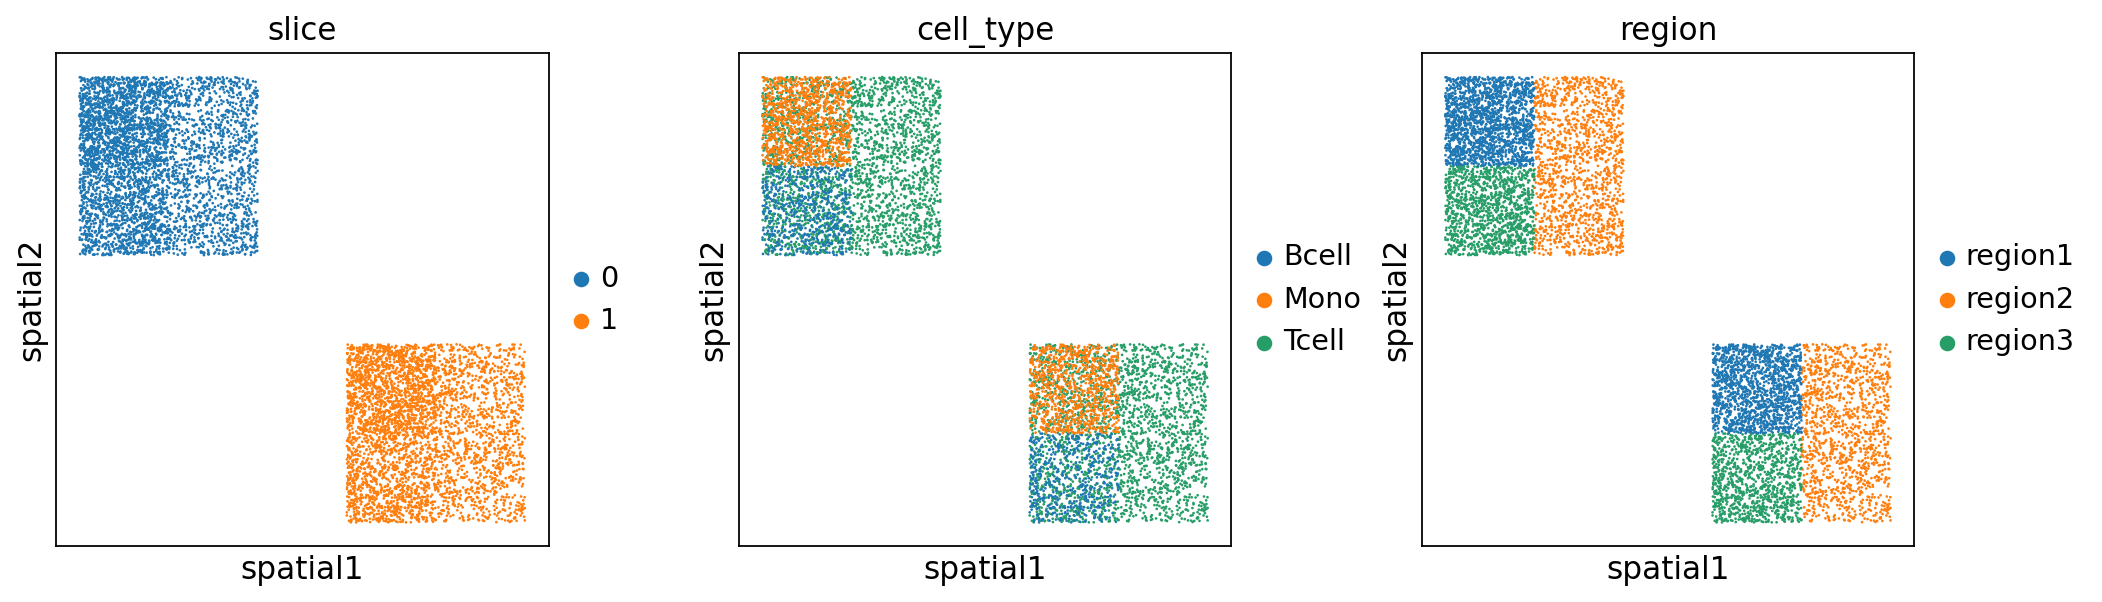

In [14]:
sc.pl.spatial(adata, color=['slice', 'cell_type', 'region'], spot_size=0.03, wspace=0.25)

In [25]:
adata = gex_embedding(adata)

2024-11-03 19:59:06.006 | INFO     | decipher.utils:gex_embedding:545 - Gene expression embedding...
2024-11-03 19:59:06.009 | INFO     | decipher.utils:select_free_gpu:310 - Using GPU [6] as computation device.
2024-11-03 19:59:06.010 | INFO     | decipher.utils:manage_gpu:435 - Using GPU 6 and None memory strategy.
/flash/grp/gglab/xiacr/DECIPHER-dev/conda/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Then we check the batch effects between slices. We can see that the batch effects are significant.

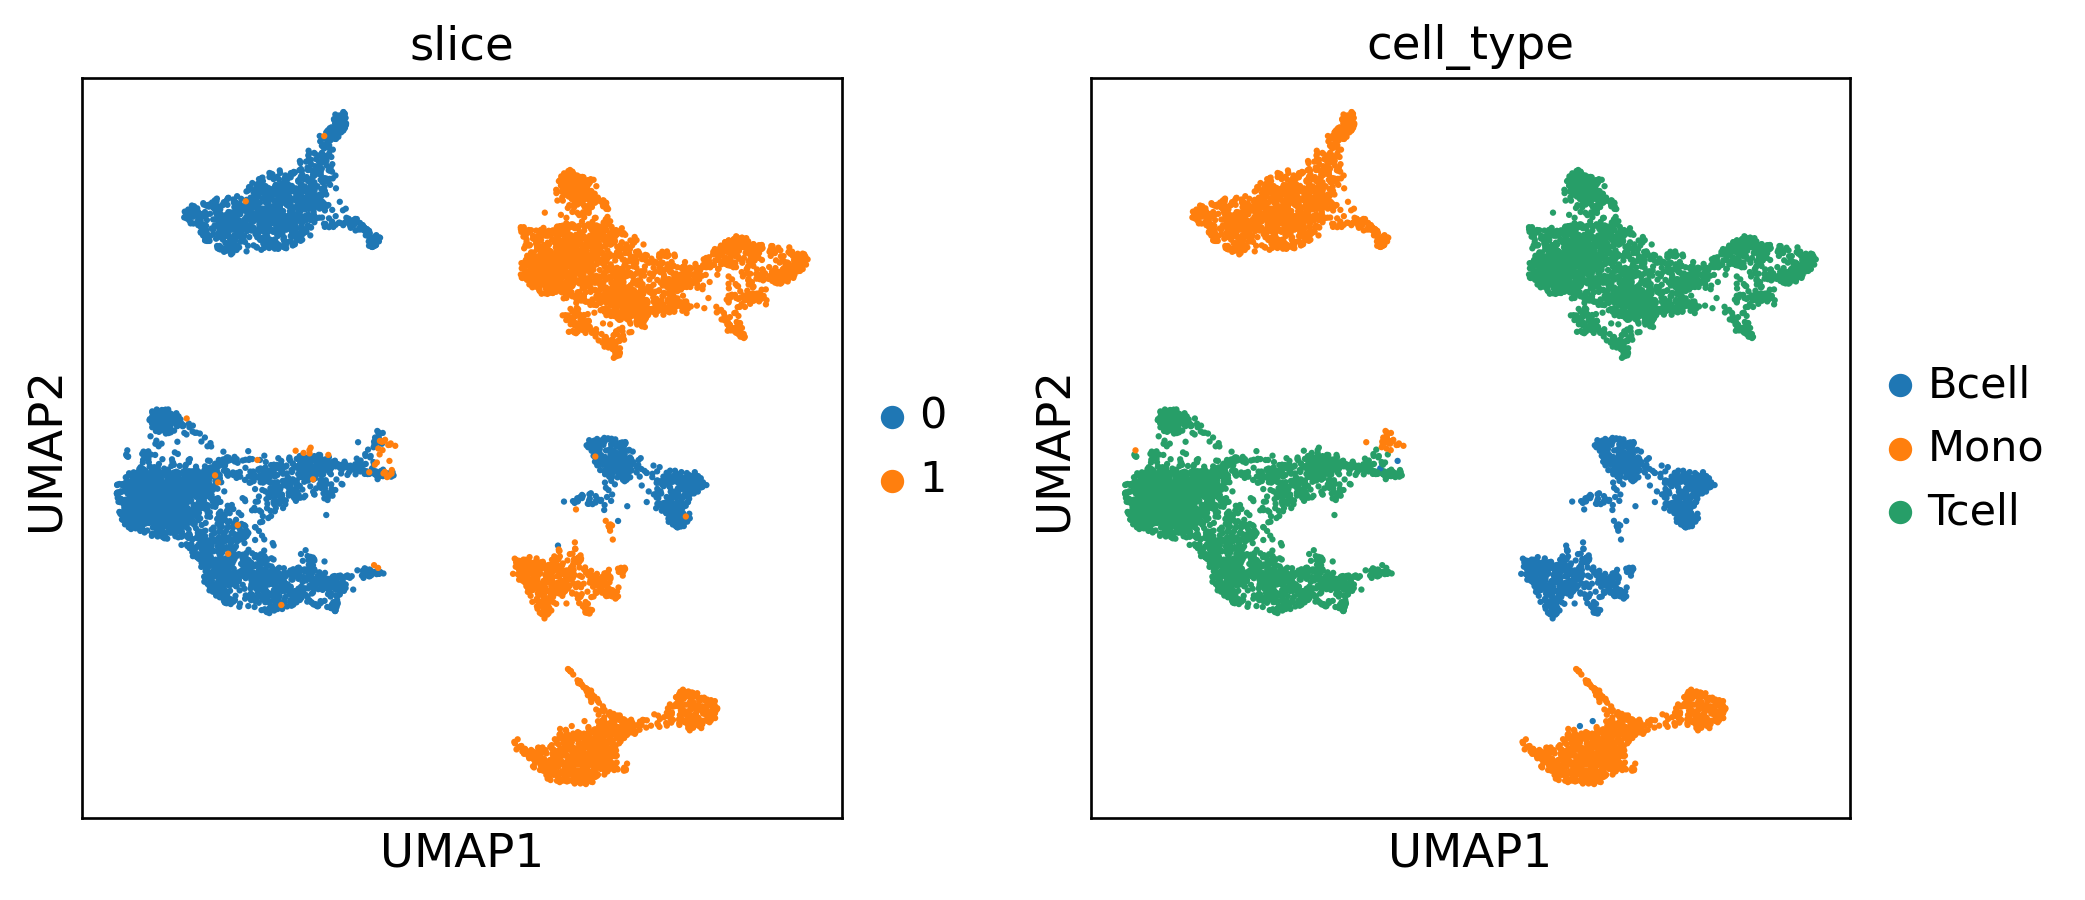

In [28]:
sc.pl.umap(adata, color=['slice', 'cell_type'])

## Step 2: Run DECIPHER

We input a list of Anndata objects, each one is a spaital slices. `DECIPHER` will automatically view each object as one batch and remove the batch effects.

> If you do not want to remove batch effects, just import the CFG by `from decipher import CFG` and  set `CFG.omics.ignore_batch = True`

In [19]:
# Init model
model = DECIPHER(work_dir='./decipher_multi_slices')

# Reload the slices
slice1 = sc.read_h5ad('./slice1.h5ad')
slice2 = sc.read_h5ad('./slice2.h5ad')

# Register the slices
model.register_data([slice1, slice2])

# Run model
model.fit_omics()

2024-11-03 19:56:56.556 | SUCCESS  | decipher.utils:global_seed:347 - Global seed set to 0.


2024-11-03 19:56:56.942 | DEBUG    | decipher.data.process:omics_data_process:68 - adata 0 has 4512 cells, 31915 genes.
2024-11-03 19:56:56.946 | DEBUG    | decipher.data.process:omics_data_process:68 - adata 1 has 3893 cells, 31915 genes.
/flash/grp/gglab/xiacr/DECIPHER-dev/decipher/data/process.py:77: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = adatas[0].concatenate(adatas[1:], batch_key="_batch", uns_merge="same")
2024-11-03 19:56:57.116 | INFO     | decipher.data.process:omics_data_process:86 - Input: 2 slice(s) with 8405 cells and 2 batches.
2024-11-03 19:56:57.117 | INFO     | decipher.data.process:_preprocess_adata:98 - Preprocessing 8405 cells.
2024-11-03 19:57:04.078 | DEBUG    | decipher.data.process:_preprocess_adata:131 - Per batch scaling.
/flash/grp/gglab/xiacr/DECIPHER-dev/conda/li

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

2024-11-03 19:57:10.571 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2024-11-03 19:57:10.576 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Metric train/total_loss improved. New best score: 3.488
Epoch 0, global step 32: 'train/total_loss' reached 3.48753 (best 3.48753), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_multi_slices/pretrain/epoch=0-step=32.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

2024-11-03 19:57:13.836 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2024-11-03 19:57:13.841 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Metric train/total_loss improved by 1.076 >= min_delta = 0.0. New best score: 2.411
Epoch 1, global step 64: 'train/total_loss' reached 2.41136 (best 2.41136), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_multi_slices/pretrain/epoch=1-step=64.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

2024-11-03 19:57:17.010 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2024-11-03 19:57:17.014 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Metric train/total_loss improved by 0.176 >= min_delta = 0.0. New best score: 2.235
Epoch 2, global step 96: 'train/total_loss' reached 2.23487 (best 2.23487), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_multi_slices/pretrain/epoch=2-step=96.ckpt' as top 3
`Trainer.fit` stopped: `max_steps=96` reached.
2024-11-03 19:57:18.695 | SUCCESS  | decipher.nn.trainer:fit:110 - Train finished in 11.80s.
2024-11-03 19:57:18.698 | INFO     | decipher.emb:_update_config:37 - Using 1879 genes as model input.
2024-11-03 19:57:18.700 | WARNING  | decipher.emb:_update_config:49 - Too few steps 192, try train more epochs.
/flash/grp/gglab/xiacr/DECIPHER-dev/conda/lib/python3.11/site-packages/torch_geometric/data/lightning/datamodule.py:43: The 'shuff

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

2024-11-03 19:57:25.753 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2024-11-03 19:57:25.759 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
2024-11-03 19:57:25.761 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2024-11-03 19:57:25.764 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Metric train/total_loss improved. New best score: 3.403
Epoch 0, global step 32: 'train/total_loss' reached 3.40333 (best 3.40333), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_multi_slices/model/epoch=0-step=32.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

2024-11-03 19:57:30.779 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2024-11-03 19:57:30.784 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
2024-11-03 19:57:30.786 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2024-11-03 19:57:30.789 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Metric train/total_loss improved by 0.175 >= min_delta = 0.0. New best score: 3.229
Epoch 1, global step 64: 'train/total_loss' reached 3.22877 (best 3.22877), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_multi_slices/model/epoch=1-step=64.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

2024-11-03 19:57:35.654 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2024-11-03 19:57:35.660 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
2024-11-03 19:57:35.662 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2024-11-03 19:57:35.665 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Metric train/total_loss improved by 0.200 >= min_delta = 0.0. New best score: 3.028
Epoch 2, global step 96: 'train/total_loss' reached 3.02828 (best 3.02828), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_multi_slices/model/epoch=2-step=96.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

2024-11-03 19:57:40.361 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2024-11-03 19:57:40.366 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
2024-11-03 19:57:40.368 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2024-11-03 19:57:40.370 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Epoch 3, global step 128: 'train/total_loss' reached 3.04683 (best 3.02828), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_multi_slices/model/epoch=3-step=128.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

2024-11-03 19:57:45.301 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2024-11-03 19:57:45.306 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
2024-11-03 19:57:45.308 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2024-11-03 19:57:45.311 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Metric train/total_loss improved by 0.049 >= min_delta = 0.0. New best score: 2.979
Epoch 4, global step 160: 'train/total_loss' reached 2.97893 (best 2.97893), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_multi_slices/model/epoch=4-step=160.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

2024-11-03 19:57:49.983 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2024-11-03 19:57:49.988 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
2024-11-03 19:57:49.990 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:41 - Save embedding to disk
2024-11-03 19:57:49.993 | DEBUG    | decipher.nn.models._omics_mixin:save_embedding:56 - Save embedding to adata
Metric train/total_loss improved by 0.075 >= min_delta = 0.0. New best score: 2.904
Epoch 5, global step 192: 'train/total_loss' reached 2.90391 (best 2.90391), saving model to '/flash/grp/gglab/xiacr/DECIPHER-dev/docs/tutorials/decipher_multi_slices/model/epoch=5-step=192.ckpt' as top 3
`Trainer.fit` stopped: `max_steps=192` reached.
2024-11-03 19:57:51.787 | SUCCESS  | decipher.nn.trainer:fit:110 - Train finished in 32.96s.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6]


Testing: |          | 0/? [00:00<?, ?it/s]

2024-11-03 19:57:53.123 | INFO     | decipher.cls:fit_omics:177 - Results saved to decipher_multi_slices


## Step 3: Visualize results

Finally, we visualize the results. We can see that the batch effects are removed, while cell types and spatial regions are well separated.

In [34]:
adata = slice1.concatenate(slice2, batch_key='slice')
adata.obsm['X_center'] = model.center_emb
adata.obsm['X_nbr'] = model.nbr_emb
adata = scanpy_viz(adata, ['center', 'nbr'], rapids=False)

/tmp/ipykernel_3326902/768322786.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = slice1.concatenate(slice2, batch_key='slice')
2024-11-03 20:01:21.735 | INFO     | decipher.utils:select_free_gpu:310 - Using GPU [2, 3] as computation device.


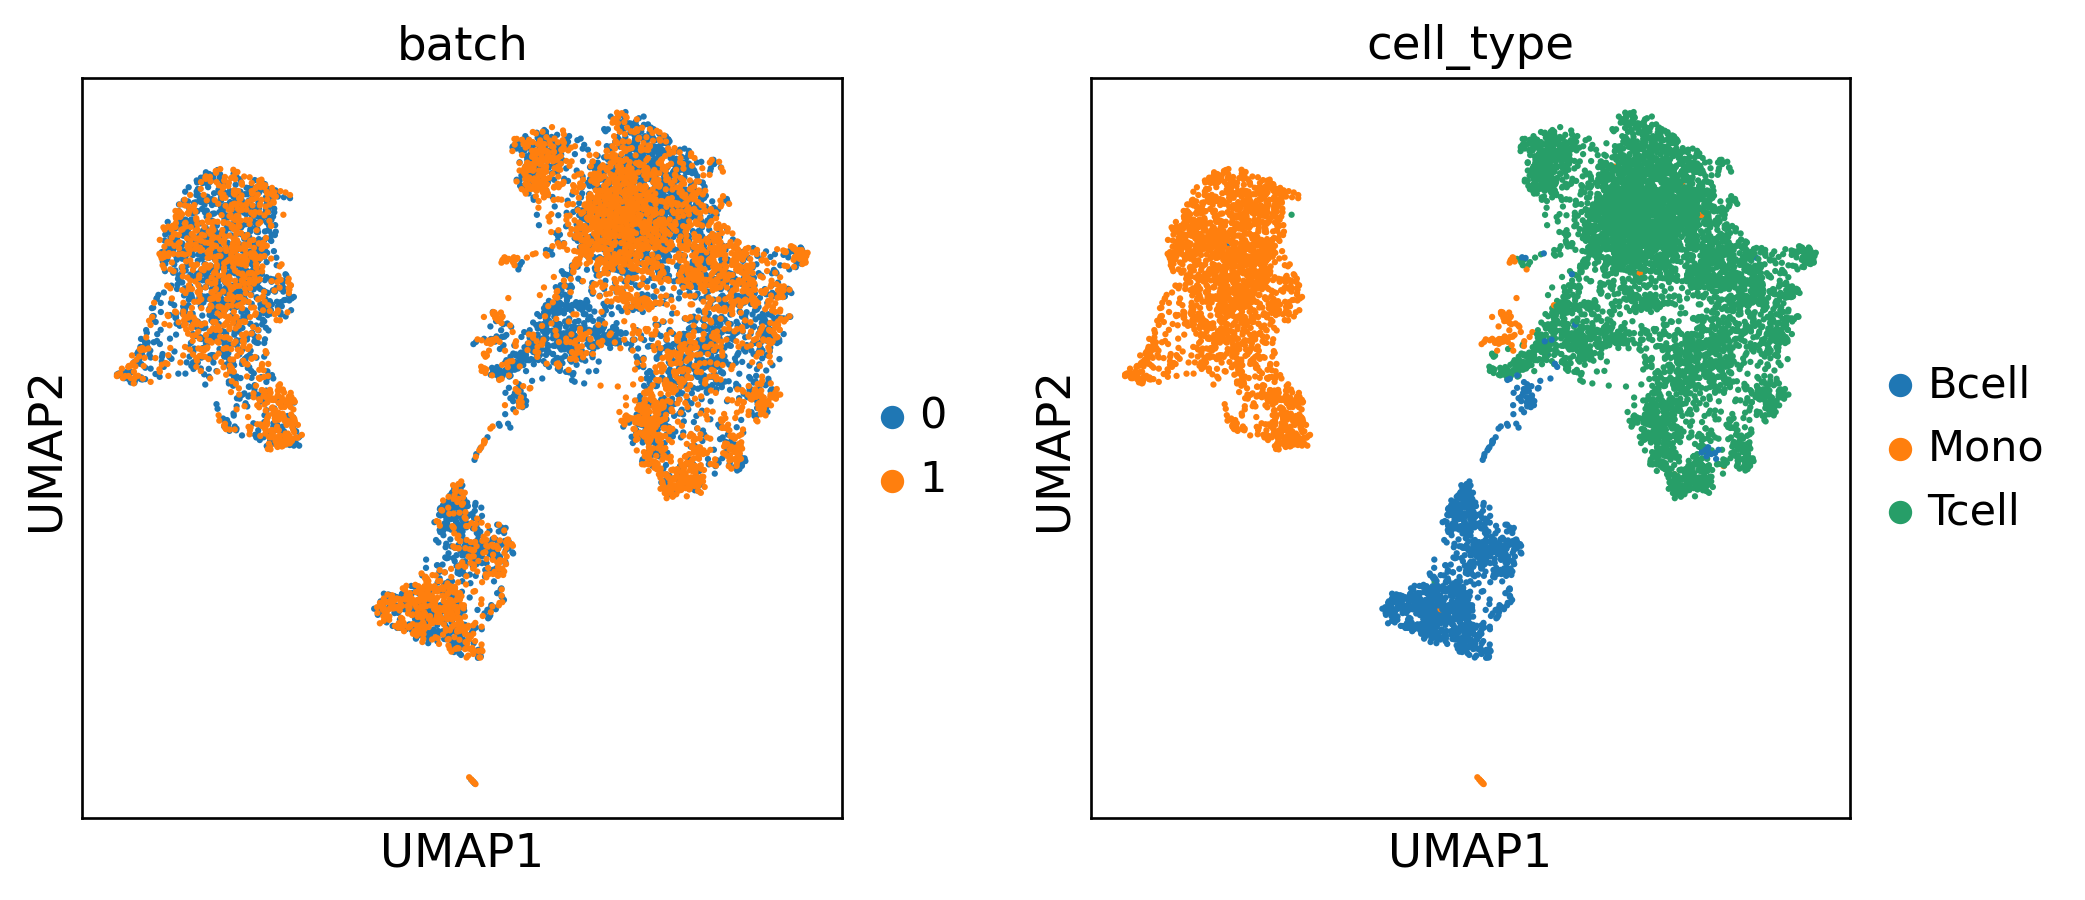

In [35]:
adata.obsm['X_umap'] = adata.obsm['X_umap_center'].copy()
sc.pl.umap(adata, color=['batch', 'cell_type'])

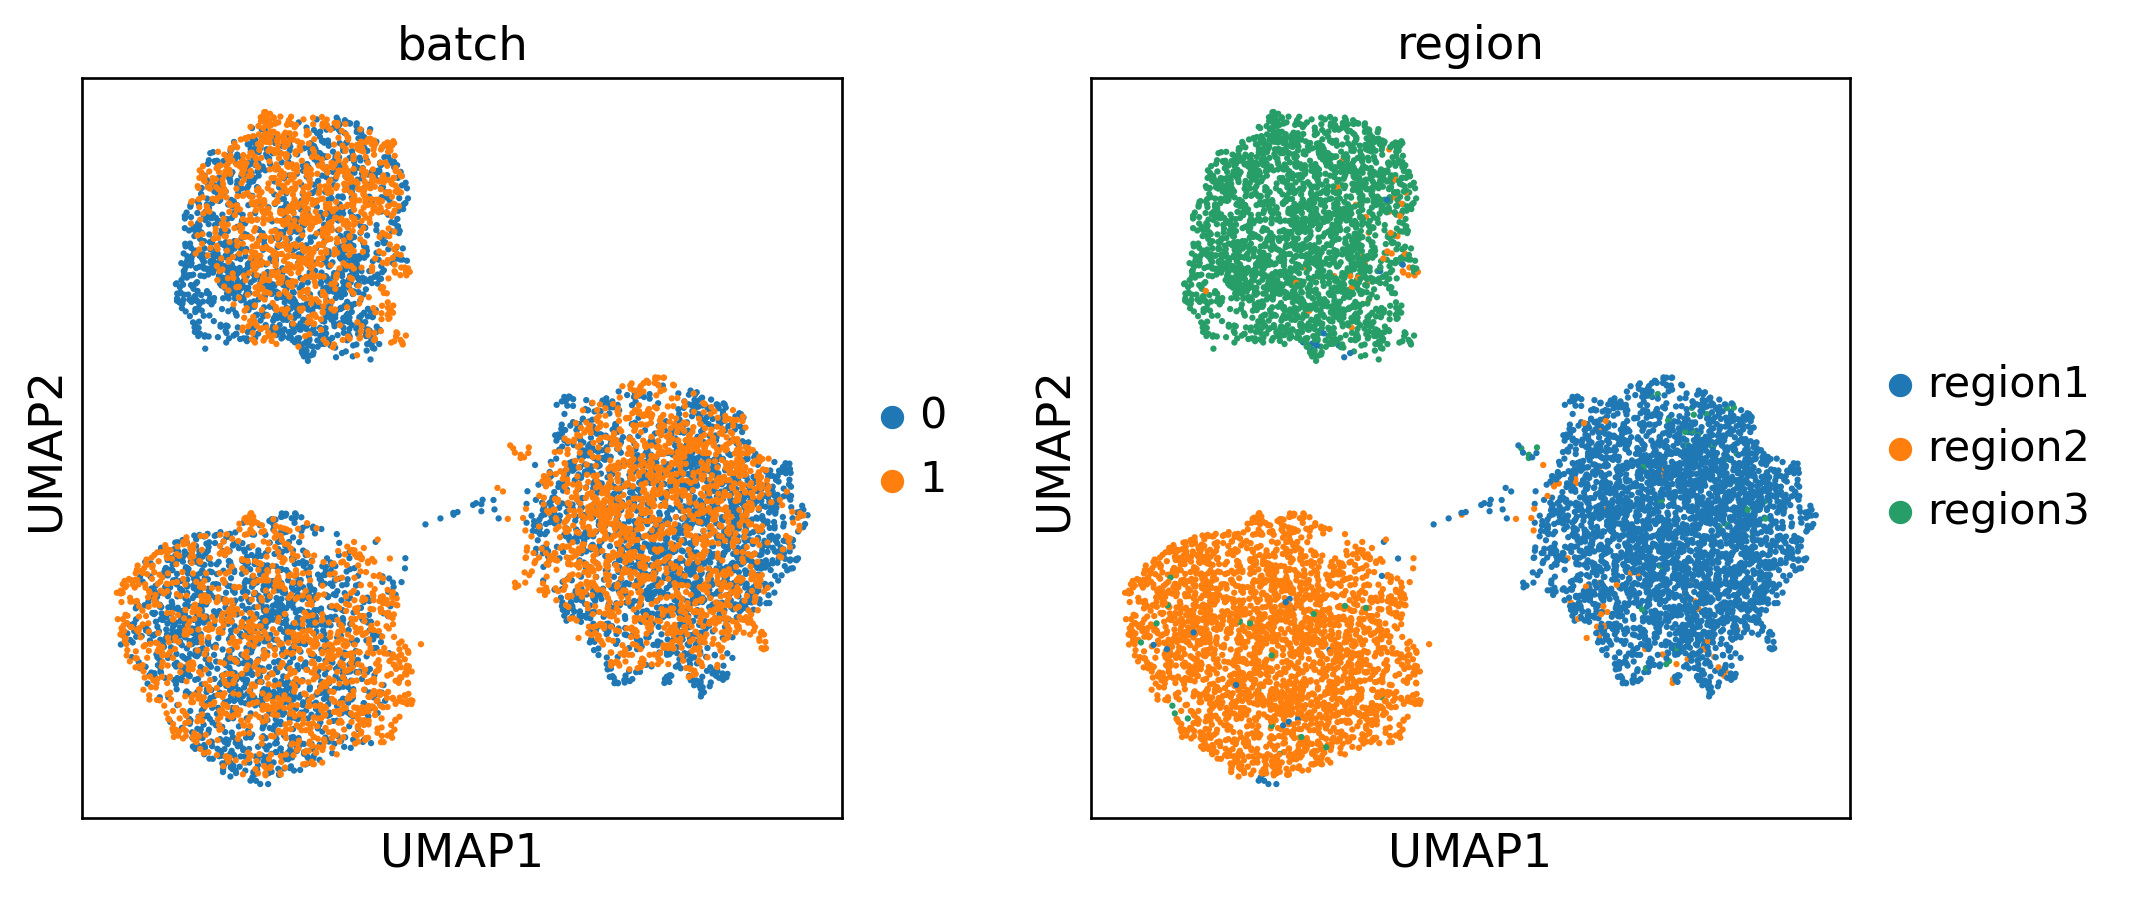

In [36]:
adata.obsm['X_umap'] = adata.obsm['X_umap_nbr'].copy()
sc.pl.umap(adata, color=['batch', 'region'])